# Image recognition

<a href = 'https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb#scrollTo=oZTImqg_CaW1'>Enlace para el colab tuto</a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)



# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()  


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


### Load dataset

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


In [3]:
test_dataset,train_dataset = dataset["test"], dataset["train"]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag','Ankle boot']

#iterator = test_dataset.__iter__() 
print(test_dataset.output_types)




(tf.uint8, tf.int64)


In [4]:
print(metadata.splits.total_num_examples)

70000


In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [9]:
#normalizacion de las imagenes para que quede en el rango de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [10]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

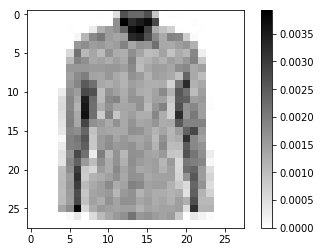

In [11]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

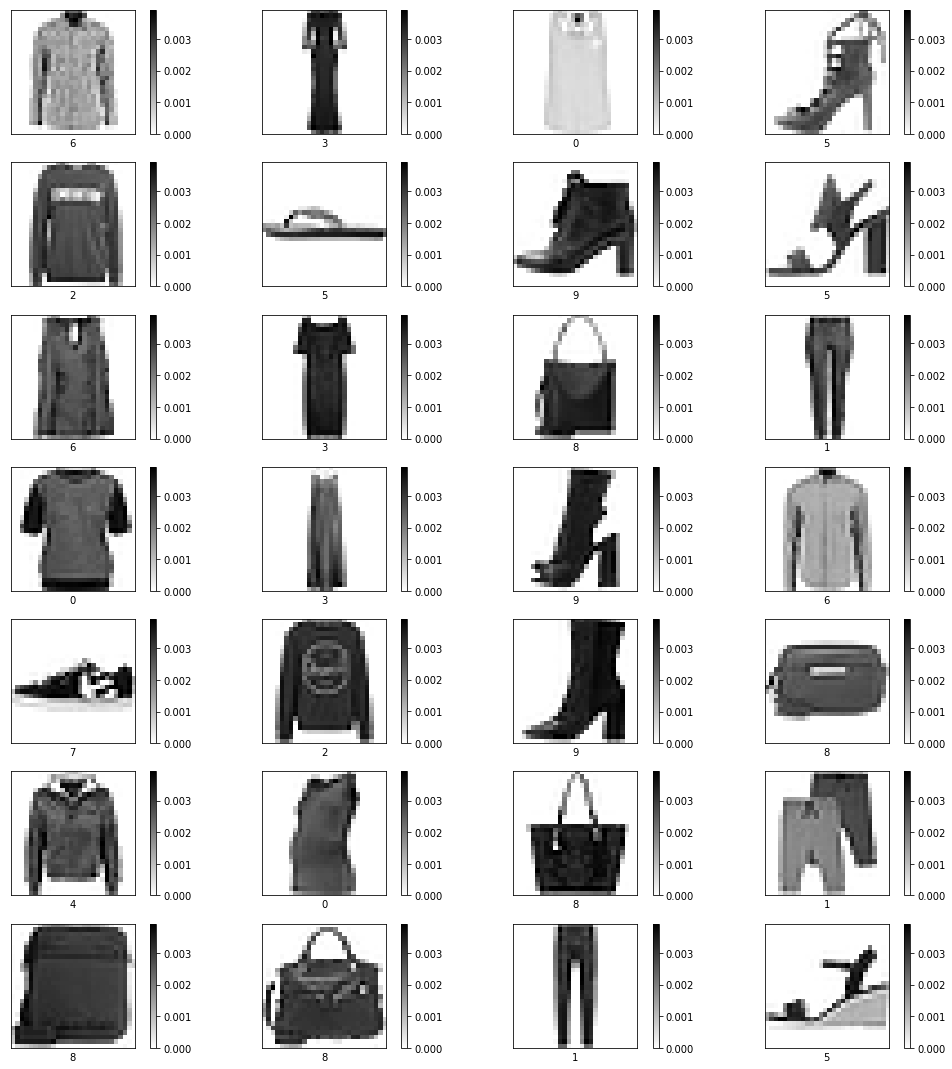

In [62]:
fig = plt.figure(figsize=(15,15))
i = 1
rows = 7
columns = 4

for image,label in test_dataset.take(28):
    image = image.numpy().reshape(28,28)
    fig.add_subplot(rows,columns,i)
    plt.imshow(image,cmap = plt.cm.binary)
    #print(label.numpy())
    #fig.subplots_adjust(bottom = 0)
    fig.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label.numpy())
    plt.colorbar()
    i+=1
    

plt.show()







# Build and compile the model of the monda

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [64]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
    


In [65]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 1.1085 - acc: 0.6518
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6557 - acc: 0.7650
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5724 - acc: 0.7926
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5373 - acc: 0.8102
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5011 - acc: 0.8243


# Evaluate accuracy

In [66]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.5165 - acc: 0.8165
Accuracy on test dataset: 0.8165


In [67]:
test_loss, test_accuracy = model.evaluate(train_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 7s 21ms/step - loss: 0.4977 - acc: 0.8275
Accuracy on test dataset: 0.827476


# Make predictions

In [68]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [69]:
predictions.shape

(32, 10)

In [70]:
predictions[0]

array([6.7961449e-03, 1.0938295e-03, 1.6835485e-01, 6.8125790e-03,
       3.7200859e-01, 1.5849510e-05, 4.3925688e-01, 2.4641681e-08,
       5.6608464e-03, 3.4618378e-07], dtype=float32)

In [71]:
np.argmax(predictions[0])

6

In [72]:
test_labels[0]

6

In [88]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

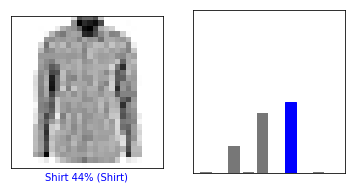

In [89]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

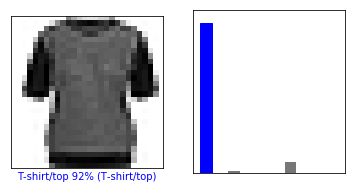

In [90]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

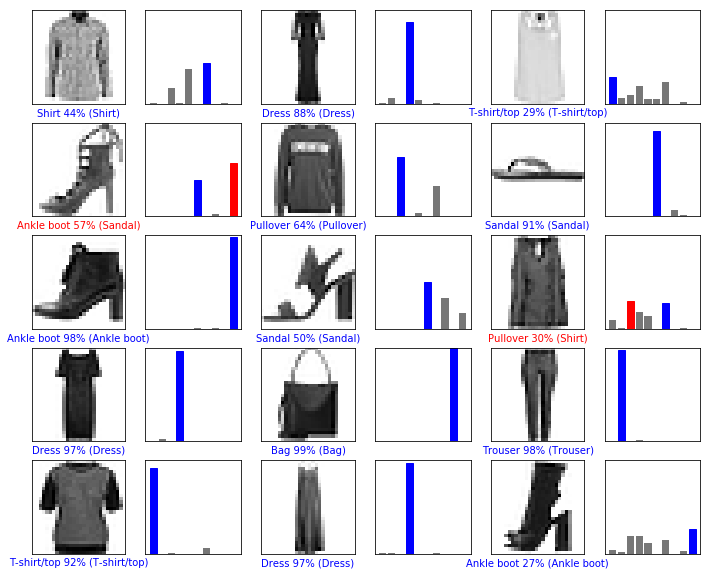

In [91]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [92]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [93]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [94]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.7961467e-03 1.0938288e-03 1.6835494e-01 6.8125809e-03 3.7200859e-01
  1.5849477e-05 4.3925679e-01 2.4641770e-08 5.6608450e-03 3.4618404e-07]]


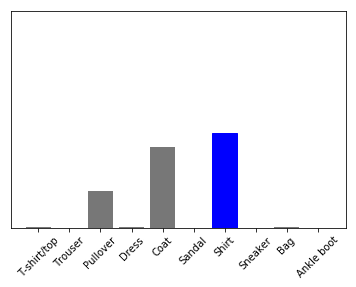

In [97]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)